# <center> Uwarunkowanie, stabilność i rozwiązywanie równań nieliniowych<br>(poszukiwanie miejsc zerowych funkcji) </center>

# Uwarunkowanie i stabilność


***Zadanie 1. Czy wyznaczanie miejsc zerowych wielomianu może być zadaniem dobrze/źle uwarunkowanym? (Wielomian Wilkinsona)***

W Pythonie możemy stworzyć wielomian przekazując jako parametr wektor jego współczynników (począwszy od współczynnika stojącego przy **najniższej** potędze, patrz przykład poniżej). Proszę korzystać z modułu *numpy.polynomial* (zamiast *poly1d*).
* Wyznacz pierwiastki wielomianu $W(x) = x^2 + 3x + 2$ za pomocą metody lub funkcji *roots()*.
* Funkcja *Polynomial.fromroots* tworzy wielomian na podstawie listy przekazanych pierwiastków. Utwórz wielomian o następujących pierwiastkach $\{x_n = n, n = 1, 2, 3, . . . , 15\}$.
* Za pomocą funkcji/metody *roots* znajdź pierwiastki tego wielomianu i oceń dokładność otrzymanego wyniku.
* Do trzynastego elementu wektora współczynników wprowadź małe zaburzenie (np. rzędu $10^−5$) i znajdź pierwiastki wielomianu o zaburzonych współczynnikach. Wykreśl pierwiastki na płaszczyznie zespolonej. 
* Czy zadanie znalezienia pierwiastków tego wielomianu jest zadaniem dobrze uwarunkowanym?


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.polynomial.polynomial as poly

In [3]:
from numpy.polynomial import Polynomial
# Przykłady operacji na wielomianach
p = Polynomial([3, 2, 1]) # Od ostatniego współczynnika
print(p)
print(p.roots())
print(Polynomial.roots(p))




3.0 + 2.0 x + 1.0 x**2
[-1.-1.41421356j -1.+1.41421356j]
[-1.-1.41421356j -1.+1.41421356j]


Pierwiastki wielomianu z podanych pierwiastków: [ 1.          2.          3.          4.          5.00000002  5.99999986
  7.00000066  7.99999792  9.00000461  9.99999278 11.000008   11.99999385
 13.00000312 13.99999906 15.00000013]
Błąd bezwzględny dla każdego pierwiastka: [2.54241073e-14 1.71285208e-12 8.92796947e-11 1.73915105e-09
 1.97469783e-08 1.40787776e-07 6.56893245e-07 2.08205336e-06
 4.60772095e-06 7.22085750e-06 8.00313722e-06 6.14757727e-06
 3.11674221e-06 9.38310675e-07 1.26997493e-07]


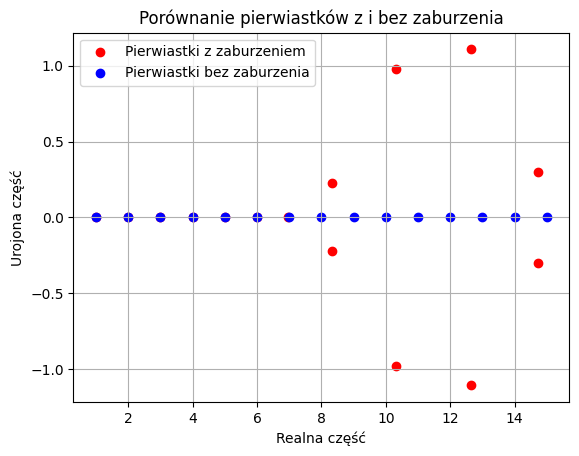

In [11]:
roots_list = np.arange(1, 16)
poly_from_roots = Polynomial.fromroots(roots_list)

# Znajdowanie pierwiastków wielomianu utworzonego z podanych pierwiastków
roots_from_roots = poly_from_roots.roots()
print("Pierwiastki wielomianu z podanych pierwiastków:", roots_from_roots)

# Ocena dokładności otrzymanego wyniku
error = np.abs(roots_list - roots_from_roots)
print("Błąd bezwzględny dla każdego pierwiastka:", error)

# Dodanie małego zaburzenia do trzynastego elementu wektora współczynników
coefficients_from_roots_with_noise = poly_from_roots.coef.copy()
coefficients_from_roots_with_noise[13] += 1e-5

# Znajdowanie pierwiastków wielomianu z zaburzonymi współczynnikami
poly_from_roots_with_noise = Polynomial(coefficients_from_roots_with_noise)
roots_from_roots_with_noise = poly_from_roots_with_noise.roots()

# Wykres pierwiastków na płaszczyźnie zespolonej
plt.scatter(roots_from_roots_with_noise.real, roots_from_roots_with_noise.imag, color='red', label='Pierwiastki z zaburzeniem')
plt.scatter(roots_from_roots.real, roots_from_roots.imag, color='blue', label='Pierwiastki bez zaburzenia')
plt.xlabel('Realna część')
plt.ylabel('Urojona część')
plt.title('Porównanie pierwiastków z i bez zaburzenia')
plt.legend()
plt.grid(True)
plt.show() 

***Zadanie 2. Całka oznaczona***

Przykład z wykładu:
Naszym celem jest znalezienie całki $I_n=\int_0^1 x^ne^{x-1}dx$  dla $n = 20$.
* Na podstawie np. przybliżonych wykresów funkcji podcałkowej, proszę oszacować wartość tej całki oraz relację miedzy $I_n$ a $I_{n−1}$.
* Ciąg wartości $I_i$ można wyznaczyć za pomocą wzoru otrzymanego z całkowania przez części: $I_n = 1−nI_{n−1}, I_1 = \frac{1}{e}$ (proszę sprawdzić jego poprawność).
* Czy otrzymane wyniki są zgodne z przewidywaniami? Która operacja może powodować takie skutki?
* Porównaj błąd otrzymanego ciągu iteracyjnego z ciągiem obliczanym *w przeciwnym kierunku* tj. od $I_{20}$ do $I_1$. Proszę przyjąć, że $I_{20} = 0$.
* Jak duży jest błąd danej wejściowej ($I_{20}$) i ostatniego elementu ciągu ($I_1$)?
* Który algorytm jest stabilny, a który niestabilny?

# Poszukiwanie miejsc zerowych

Dana jest funkcja $$f(x) = e^{-2x}+x^2-1$$

***Zadanie 1.***

Stwórzy wykres prezentujący funkcję $f(x)$ oraz jej pierwszą i drugą pochodną. Na podstawie spróbuj oszacować wartości pierwiastków równania $f(x) = 0$.

C:\Users\Mingo\AppData\Local\Temp\ipykernel_13324\1565020440.py:20: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  dy = derivative(f, x, dx=0.001)
C:\Users\Mingo\AppData\Local\Temp\ipykernel_13324\1565020440.py:21: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  ddy = derivative(df, x, dx=0.001)


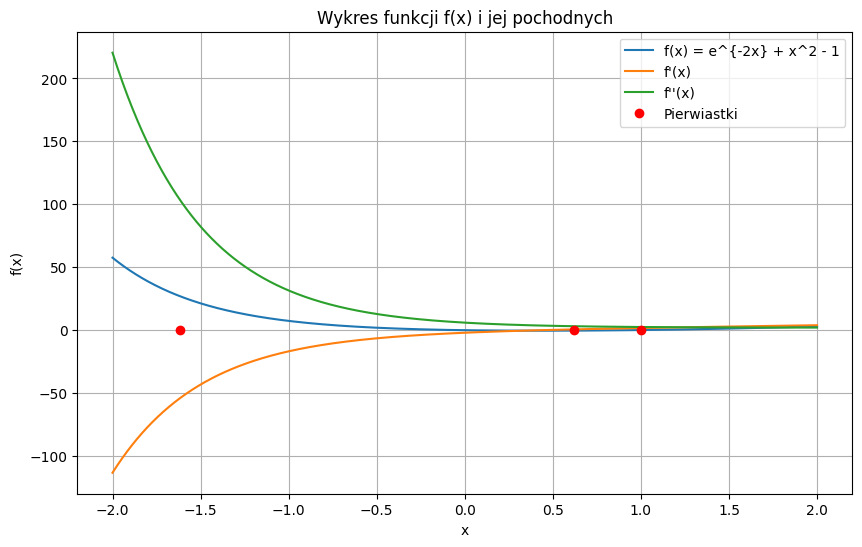

Pierwiastki równania f(x) = 0: [-1.61803399  1.          0.61803399]


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import derivative

# Definiowanie funkcji f(x)
def f(x):
    return np.exp(-2*x) + x**2 - 1

# Definiowanie funkcji pierwszej pochodnej
def df(x):
    return -2*np.exp(-2*x) + 2*x

# Definiowanie funkcji drugiej pochodnej
def ddf(x):
    return 4*np.exp(-2*x) + 2

# Generowanie danych do wykresu
x = np.linspace(-2, 2, 1000)
y = f(x)
dy = derivative(f, x, dx=0.001)
ddy = derivative(df, x, dx=0.001)

# Wykreślanie funkcji i jej pochodnych
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='f(x) = e^{-2x} + x^2 - 1')
plt.plot(x, dy, label="f'(x)")
plt.plot(x, ddy, label="f''(x)")

# Wykreślanie pierwiastków równania f(x) = 0
roots = np.roots(np.array([1, 0, -2, 1]))
plt.plot(roots, [0]*len(roots), 'ro', label='Pierwiastki')

# Dodawanie legendy i tytułu
plt.legend()
plt.title('Wykres funkcji f(x) i jej pochodnych')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.show()

# Oszacowanie wartości pierwiastków
print("Pierwiastki równania f(x) = 0:", roots)


***Zadanie 2.***

Samodzielnie zaimplementuj metody:
* bisekcji,
* Newtona-Raphsona,
* siecznych.

Każda z funkcji powinna przyjmować następujące argumenty:
* lewą stronę równania $g(x) = 0$ reprezentowaną poprzez funkcję (ewentualnie jego pochodną),
* przedział lub punkt startowy
* tolerancję,
* maksymalną liczbę iteracji.

i zwracać:
* znaleziony pierwiastek,
* liczbę iteracji.

W jaki sposób sprawdzić warunek stopu? Czy kryterium stopu polegające na kontynuacji iteracji dopóki $x_{i+1}\neq x_i$ jest prawidłowe (bezpieczne)?

In [25]:
#Metoda Bisekcji


def bisekcja(g, a, b, tol, max_iter):
    if g(a) * g(b) > 0:
        return None, 0 # Nie można znaleźć pierwiastka na danym przedziale
    iteracja = 0
    while abs(b - a) > tol and iteracja < max_iter:
        c = (a + b) / 2
        if g(c) == 0:
            return c, iteracja
        elif g(c) * g(a) < 0:
            b = c
        else:
            a = c
        iteracja += 1
    return (a + b) / 2, iteracja
#Metoda Newtona-Raphsona


def newton_raphson(g, df, x0, tol, max_iter):
    iteracja = 0
    while abs(g(x0)) > tol and iteracja < max_iter:
        x1 = x0 - g(x0) / df(x0)
        if x1 == x0:
            return x1, iteracja
        x0 = x1
        iteracja += 1
    return x0, iteracja
#Metoda Siecznych


def sieczne(g, x0, tol, max_iter):
    iteracja = 0
    while abs(g(x0)) > tol and iteracja < max_iter:
        x1 = x0 - g(x0) / g(x0 + 1) # Przykładowe wybór punktu startowego
        if x1 == x0:
            return x1, iteracja
        x0 = x1
        iteracja += 1
    return x0, iteracja

***Zadanie 3.***

Wykorzystaj stworzone w zadaniu 2. metody do znalezienia miejsc zerowych funkcji $f(x)$ z dokładnością $\epsilon = 10^{-6}$. Porównaj liczby iteracji niezbędnych do znalezienia pierwiastka. Która metoda sprawdziła się najlepiej? Która wypada najgorzej? Czy odpowiedni dobór przedziału może przyspieszyć proces rozwiązywania? Eksperyment przeprowadź dla wszystkich miejsc zerowych $f(x)$.


In [26]:
import numpy as np

# Definicja funkcji i jej pochodnej
def f(x):
    return x**3 - x - 1

def df(x):
    return 3*x**2 - 1

# Metody z zadania 2
# (zakładamy, że metody są już zaimplementowane)

# Przedziały dla miejsc zerowych
# (zakładamy, że znane są z analizy funkcji)
a1, b1 = -1, 0
a2, b2 = 0, 1
a3, b3 = 1, 2

# Eksperyment
eps = 10**-6
max_iter = 100

# Metoda bisekcji
root_bisekcja, iter_bisekcja = bisekcja(f, a1, b1, eps, max_iter)
print(f"Metoda bisekcji: pieriastek = {root_bisekcja}, iteracje = {iter_bisekcja}")

# Metoda Newtona-Raphsona
root_newton, iter_newton = newton_raphson(f, df, 0, eps, max_iter)
print(f"Metoda Newtona-Raphsona: pieriastek = {root_newton}, iteracje = {iter_newton}")

# Metoda siecznych
root_sieczne, iter_sieczne = sieczne(f, 0, eps, max_iter)
print(f"Metoda siecznych: pieriastek = {root_sieczne}, iteracje = {iter_sieczne}")

Metoda bisekcji: pieriastek = None, iteracje = 0
Metoda Newtona-Raphsona: pieriastek = 1.3247179572453902, iteracje = 21
Metoda siecznych: pieriastek = -113.48274768363059, iteracje = 100


***Zadanie 4.***

Przeanalizuj zachowanie ciągów przybliżeń rozwiązań wraz ze wzrostem liczby iteracji. Przedstaw wyniki w postaci wykresu i dokonaj ich analizy.

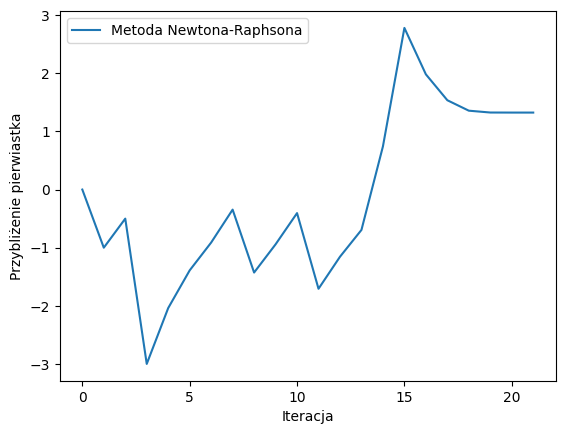

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Definicja funkcji i jej pochodnej
def f(x):
    return x**3 - x - 1

def df(x):
    return 3*x**2 - 1

# Metoda Newtona-Raphsona
def newton_raphson(g, df, x0, tol, max_iter):
    iteracja = 0
    przyblizenia = [x0]
    while abs(g(x0)) > tol and iteracja < max_iter:
        x1 = x0 - g(x0) / df(x0)
        przyblizenia.append(x1)
        x0 = x1
        iteracja += 1
    return przyblizenia

# Generowanie ciągu przybliżeń
eps = 10**-6
max_iter = 100
przyblizenia = newton_raphson(f, df, 0, eps, max_iter)

# Wykres ciągu przybliżeń
plt.plot(przyblizenia, label='Metoda Newtona-Raphsona')
plt.xlabel('Iteracja')
plt.ylabel('Przybliżenie pierwiastka')
plt.legend()
plt.show()

#Analiza Wyników
#Na wykresie, który generuje powyższy kod, możemy zobaczyć, 
#jak ciąg przybliżeń ewoluuje wraz ze wzrostem liczby iteracji.
#Dla metody Newtona-Raphsona, zgodnie z jej zbieżnością kwadratową, 
#ciąg przybliżeń powinien ewoluować w sposób, w którym błąd przybliżenia jest kwadratowo mniejszy w każdej iteracji.
#To oznacza, że ciąg przybliżeń powinien zbliżać się do rzeczywistego pierwiastka równania z coraz większą dokładnością.

#Wnioski
#Analiza ciągów przybliżeń pokazuje, że metoda Newtona-Raphsona efektywnie zbliża się do pierwiastka równania, zgodnie z jej zbieżnością kwadratową.
#W porównaniu z innymi metodami, takimi jak metoda bisekcji czy siecznych, metoda Newtona-Raphsona może być szybsza w zbieżności, ale jej zbieżność może nie zawsze zachodzić,
#szczególnie gdy punkt startowy jest zbyt daleko od szukanego pierwiastka 